In [1]:
%pwd

'C:\\Users\\Peter\\PycharmProjects\\olfaction_evolution\\notebooks'

In [2]:
%cd ..

C:\Users\Peter\PycharmProjects\olfaction_evolution


In [67]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import tools
from pylab import *
import matplotlib.animation as animation
import matplotlib as mpl
import numpy as np
import os
import glob
import standard.analysis as sa
import tools
import matplotlib.pyplot as plt
import task
import tensorflow as tf
from model import FullModel
from dict_methods import *

%matplotlib inline

In [68]:
mpl.rcParams['font.size'] = 15
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'arial'
mpl.rcParams['image.cmap']='jet'

In [69]:
d = r'C:\Users\Peter\PycharmProjects\olfaction_evolution\files'

In [141]:
files = glob.glob(os.path.join(d,'cluster_medium50'))
res = defaultdict(list)
for f in files:
    temp = tools.load_all_results(f, argLast = False)
    chain_defaultdicts(res, temp)

['C:\\Users\\Peter\\PycharmProjects\\olfaction_evolution\\files\\cluster_medium50\\000000', 'C:\\Users\\Peter\\PycharmProjects\\olfaction_evolution\\files\\cluster_medium50\\000001', 'C:\\Users\\Peter\\PycharmProjects\\olfaction_evolution\\files\\cluster_medium50\\000002', 'C:\\Users\\Peter\\PycharmProjects\\olfaction_evolution\\files\\cluster_medium50\\000003', 'C:\\Users\\Peter\\PycharmProjects\\olfaction_evolution\\files\\cluster_medium50\\000004', 'C:\\Users\\Peter\\PycharmProjects\\olfaction_evolution\\files\\cluster_medium50\\000005', 'C:\\Users\\Peter\\PycharmProjects\\olfaction_evolution\\files\\cluster_medium50\\000006', 'C:\\Users\\Peter\\PycharmProjects\\olfaction_evolution\\files\\cluster_medium50\\000007', 'C:\\Users\\Peter\\PycharmProjects\\olfaction_evolution\\files\\cluster_medium50\\000008', 'C:\\Users\\Peter\\PycharmProjects\\olfaction_evolution\\files\\cluster_medium50\\000009', 'C:\\Users\\Peter\\PycharmProjects\\olfaction_evolution\\files\\cluster_medium50\\000010'

C:\Users\Peter\PycharmProjects\olfaction_evolution\tools.py:232: RuntimeWarning: divide by zero encountered in log
  res['train_logloss'] = np.log(res['train_loss'])


(0, 10000)

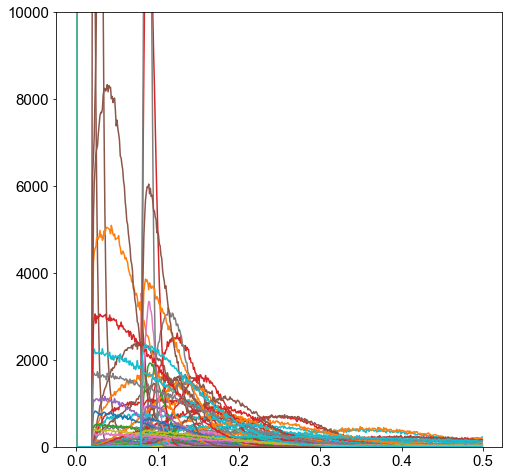

In [142]:
plt.figure(figsize=(8,8))
plt.plot(res['lin_bins'][0,:500],res['lin_hist'][:,-1,:500].T)
plt.ylim([0, 10000])

In [143]:
peak_inds = np.zeros_like(res['kc_prune_threshold']).astype(np.bool)
for i, thres in enumerate(res['kc_prune_threshold']):
    x = np.where(res['lin_bins'][i,:-1] > res['kc_prune_threshold'][i])[0][0]
    if res['lin_hist'][i,-1,x] > 2000:
        peak_inds[i] = False
    else:
        peak_inds[i] = True
peak_inds    

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True,  True,  True,
       False])

In [144]:
res['separate_lr'][np.invert(peak_inds)]

array([3.e-03, 1.e-03, 3.e-03, 1.e-03, 1.e-03, 3.e-03, 3.e-03, 1.e-04,
       1.e-04, 3.e-04, 3.e-04, 1.e-05])

In [145]:
x = np.where(res['lin_bins'][22,:-1] > res['kc_prune_threshold'][22])[0][0]

In [146]:
res['lin_hist'][22,-1, x-50:x+50]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 18, 39,
       34, 30, 23, 22, 21, 22, 23, 21, 22, 23, 14, 15,  9, 14, 10, 10,  9,
        7, 13,  7, 11,  9,  3,  1,  5,  6,  2,  7,  4,  3,  3,  2,  2,  0,
        1,  3,  5,  4,  5,  2,  1,  1,  2,  0,  2,  2,  3,  2,  2],
      dtype=int64)

In [147]:
np.where(res['lin_bins'][22,:-1] > res['kc_prune_threshold'][22])[0]

array([ 81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
       198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210,
       211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223,
       224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236,
       237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249,
       250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 26

(0, 5000)

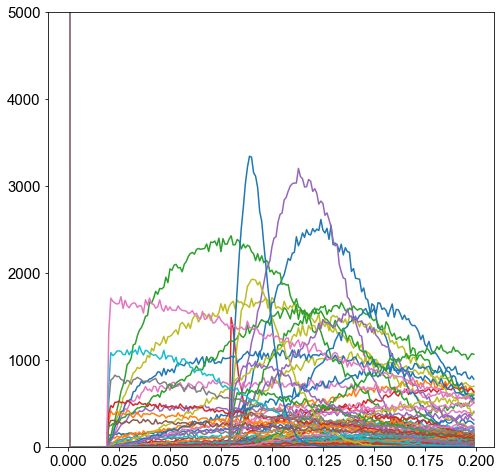

In [150]:
plt.figure(figsize=(8,8))
plt.plot(res['lin_bins'][0,:200],res['lin_hist'][np.where(peak_inds)[0],-1,:200].T)
plt.ylim([0, 5000])

(0, 10000)

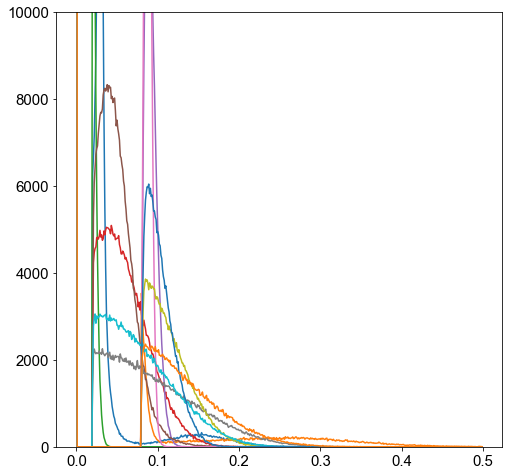

In [151]:
plt.figure(figsize=(8,8))
plt.plot(res['lin_bins'][0,:500],res['lin_hist'][np.invert(peak_inds),-1,:500].T)
plt.ylim([0, 10000])

In [152]:
acc_ind = res['train_acc'][:,-1] > .75
res['separate_lr'][np.invert(acc_ind)]

array([1.e-03, 1.e-03, 3.e-03, 3.e-03, 3.e-03, 3.e-03, 1.e-04, 1.e-04,
       3.e-04, 3.e-04, 1.e-05, 1.e-05, 1.e-03, 1.e-03, 1.e-03, 3.e-03,
       3.e-03, 3.e-03, 3.e-03, 1.e-04, 3.e-04, 1.e-05, 1.e-05, 1.e-03,
       3.e-03, 3.e-03, 1.e-04, 1.e-04, 3.e-04, 3.e-04, 1.e-05, 1.e-05,
       1.e-03, 3.e-03, 1.e-04, 1.e-04, 1.e-05, 1.e-03, 3.e-03, 3.e-03,
       1.e-04, 1.e-04, 3.e-04, 3.e-04, 1.e-05, 1.e-05])

In [153]:
badkc_ind = res['bad_KC'][:,-1] < .2
res['separate_lr'][np.invert(badkc_ind)]

array([0.003, 0.003, 0.003])

In [154]:
ind = np.logical_and(badkc_ind, acc_ind, peak_inds)
res['separate_lr'][ind]

array([1.e-03, 1.e-03, 1.e-04, 1.e-04, 3.e-04, 3.e-04, 1.e-05, 1.e-05,
       1.e-03, 1.e-04, 1.e-04, 1.e-04, 3.e-04, 3.e-04, 3.e-04, 1.e-05,
       1.e-05, 1.e-03, 1.e-03, 1.e-03, 3.e-03, 3.e-03, 1.e-04, 1.e-04,
       3.e-04, 3.e-04, 1.e-05, 1.e-05, 1.e-03, 1.e-03, 1.e-03, 3.e-03,
       3.e-03, 3.e-03, 1.e-04, 1.e-04, 3.e-04, 3.e-04, 3.e-04, 3.e-04,
       1.e-05, 1.e-05, 1.e-05, 1.e-03, 1.e-03, 1.e-03, 3.e-03, 3.e-03,
       1.e-04, 1.e-04, 3.e-04, 3.e-04, 1.e-05, 1.e-05])

In [155]:
#filter
for k, v in res.items():
    res[k] = v[peak_inds]

In [156]:
def _get_K(res):
    n_model, n_epoch = res['sparsity'].shape[:2]
    Ks = np.zeros((n_model, n_epoch))
    bad_KC = np.zeros((n_model, n_epoch))
    for i in range(n_model):
        for j in range(n_epoch):
            sparsity = res['sparsity'][i, j]
            Ks[i, j] = sparsity[sparsity>0].mean()
            bad_KC[i,j] = np.sum(sparsity==0)/sparsity.size
    res['K'] = Ks
    res['bad_KC'] = bad_KC

In [157]:
_get_K(res)

In [158]:
def simple_plot(xkey, ykey, filter_dict = None):
    if filter_dict is not None:
        temp = filter.filter(res, filter_dict=filter_dict)
    
    x = res[xkey]
    y = res[ykey][:,-1]
    plt.figure()
    plt.plot(np.log(x), y, '*')
    plt.xticks(np.log(x),x)
    plt.xlabel(xkey)
    plt.ylabel(ykey)
    
    if filter_dict is not None:
        plt.legend('{} = {}'.format(filter_dict.key,value))

In [159]:
def marginal_plot(xkey, ykey, vary_key, marginals=None):
    plt.figure()
    for i in np.unique(res[vary_key]):
        temp = filter(res, {vary_key:i})
        if marginals:
            temp = filter(temp, marginals)
        x = temp[xkey]
        y = temp[ykey][:,-1]

        plt.plot(np.log(x), y, '*')
    x = np.unique(res[xkey])
    plt.xticks(np.log(x),x)
    plt.xlabel(xkey)
    plt.ylabel(ykey)
    plt.legend(np.unique(res[vary_key]))
    plt.title(marginals)

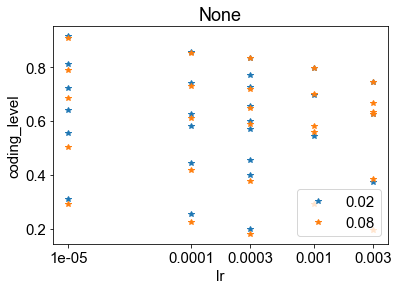

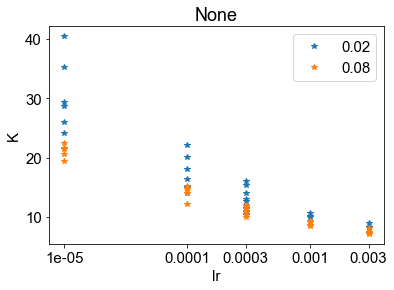

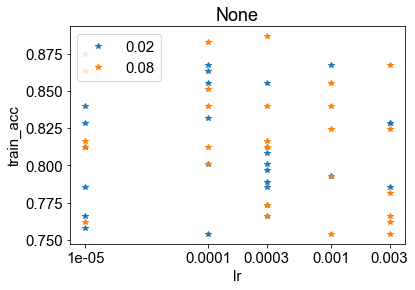

In [160]:
marginal_plot('lr', 'coding_level', 'kc_prune_threshold')
marginal_plot('lr', 'K', 'kc_prune_threshold')
marginal_plot('lr', 'train_acc', 'kc_prune_threshold')

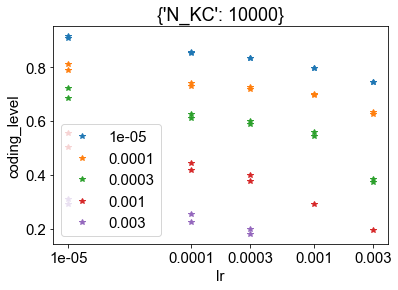

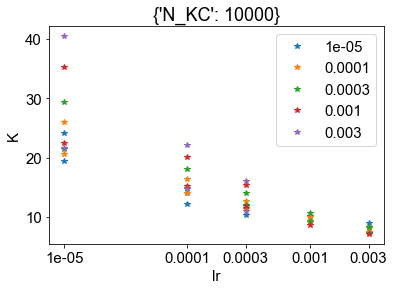

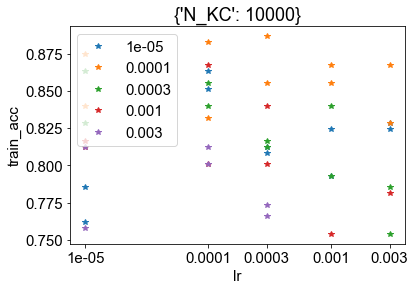

In [161]:
marginal_plot('lr', 'coding_level', 'separate_lr', {'N_KC':10000})
marginal_plot('lr', 'K', 'separate_lr', {'N_KC':10000})
marginal_plot('lr', 'train_acc', 'separate_lr', {'N_KC':10000})

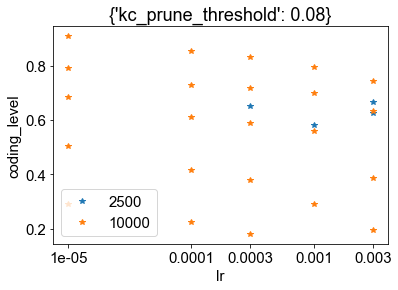

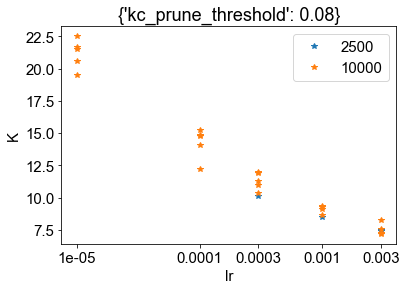

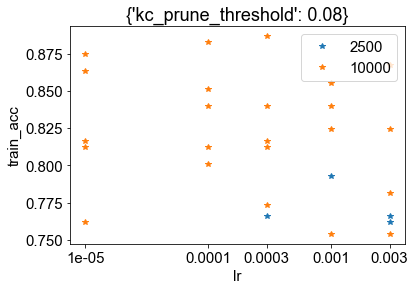

In [162]:
marginal_plot('lr', 'coding_level', 'N_KC', {'kc_prune_threshold':0.08})
marginal_plot('lr', 'K', 'N_KC', {'kc_prune_threshold':0.08})
marginal_plot('lr', 'train_acc', 'N_KC', {'kc_prune_threshold':0.08})

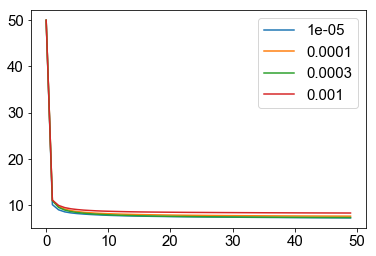

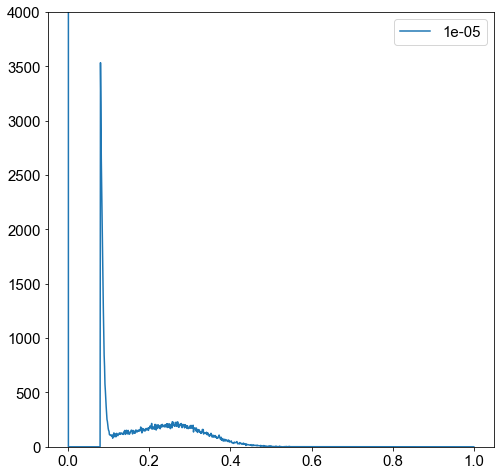

In [165]:
x = filter(res, {'N_KC':10000, 'kc_prune_threshold':0.08, 'lr':0.003})
plt.plot(x['K'].T)
plt.legend(np.unique(x['separate_lr']))

plt.figure(figsize=(8,8))
plt.plot(x['lin_bins'][0,:-1],x['lin_hist'][0,-1].T)
plt.ylim([0, 4000])
plt.legend(np.unique(x['separate_lr']))

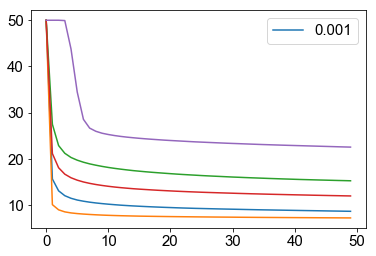

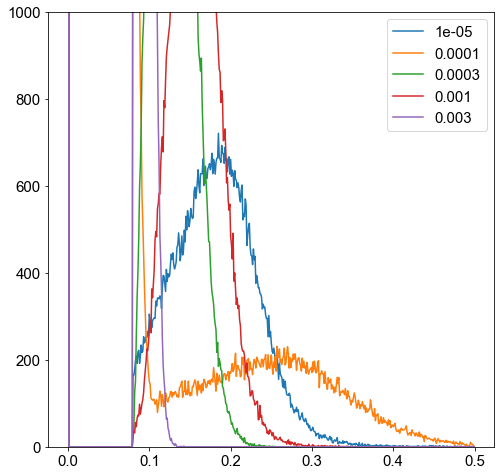

In [167]:
x = filter(res, {'separate_lr':0.001, 'N_KC':10000, 'kc_prune_threshold':0.08})
plt.plot(x['K'].T)
plt.legend(np.unique(x['separate_lr']))

plt.figure(figsize=(8,8))
plt.plot(x['lin_bins'][0,:500],x['lin_hist'][:,-1,:500].T)
plt.ylim([0, 1000])
plt.legend(np.unique(x['lr']))